In [2]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))

['test.csv', 'train.csv']


# 데이터 불러오기

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

## 반올림

In [4]:
np.round(train, 4) 

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


# 여러가지 features combinations

In [5]:
from scipy.stats import norm, rankdata

In [6]:
for col in test.columns[1:201] :
    col_names = col + '^2'
    train[col_names] = train[col] * train[col] #제곱
    test[col_names] = test[col] * test[col]
    
    col_names = col + '^3'
    train[col_names] = train[col] * train[col] * train[col] #세제곱
    test[col_names] = test[col] * test[col] *test[col]
    
    col_names = col + '_log'
    train[col_names] = np.log(train[col] - train[col].min() + 0.00001) #min값을 더해서 log
    test[col_names] = np.log(test[col] - test[col].min() + 0.00001)
    
    train[col+'_cp'] = rankdata(train[col]).astype('float32')
    test[col+'_cp'] = rankdata(test[col]).astype('float32')
    
    train[col+'_cnp'] = norm.cdf(train[col]).astype('float32')
    test[col+'_cnp'] = norm.cdf(test[col]).astype('float32')

In [7]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (200000, 1202)
test shape :  (200000, 1201)


# lgb model

In [10]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMRegressor
lgb = LGBMRegressor() #default
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
x_train = train.drop(['target', 'ID_code'], axis = 1)
y_train = train['target']
x_test = test.drop(['ID_code'], axis = 1)
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_test)
submission = pd.DataFrame({'ID_code' : test['ID_code'], 'target' : y_pred})
submission.to_csv('Submission_190308.csv',index=False)

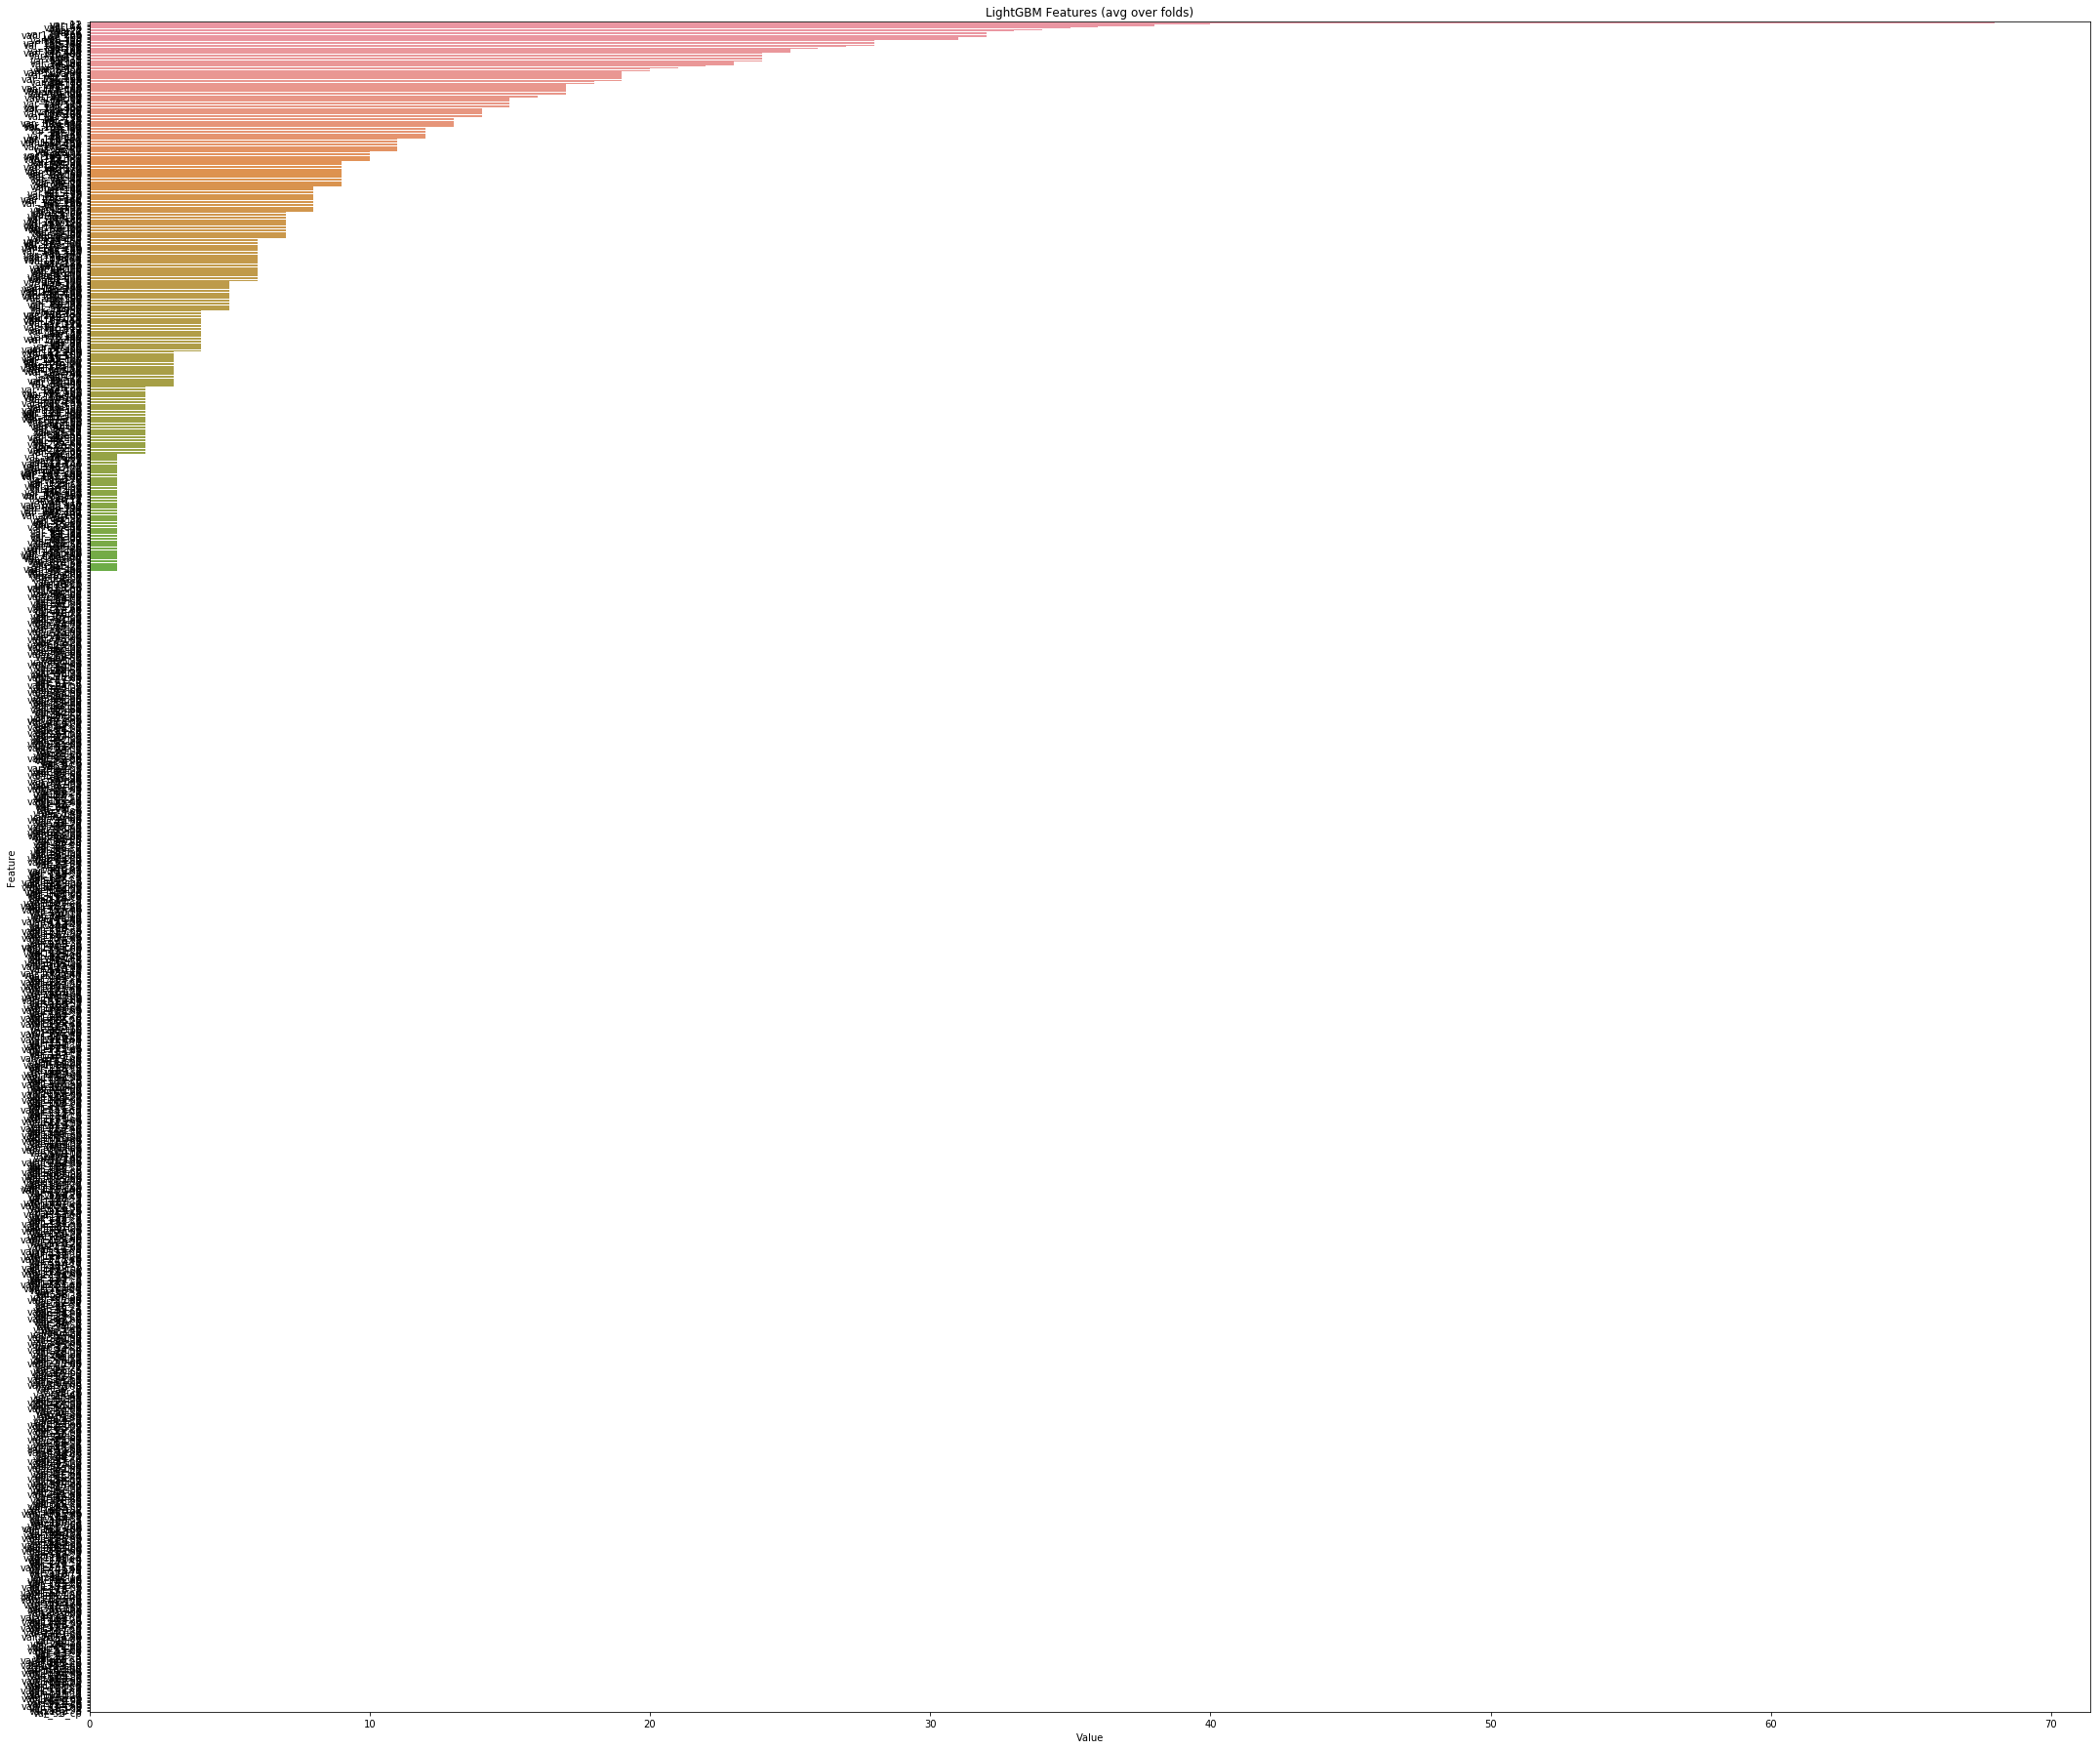

In [24]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(30, 25))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# drop columns

In [25]:
drop_columns = feature_imp.loc[feature_imp.Value == 0, 'Feature'].tolist()

In [27]:
len(drop_columns)

810

In [26]:
x_train.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_198^2', 'var_198^3', 'var_198_log', 'var_198_cp', 'var_198_cnp',
       'var_199^2', 'var_199^3', 'var_199_log', 'var_199_cp', 'var_199_cnp'],
      dtype='object', length=1200)

In [35]:
x_train = x_train.drop(drop_columns, axis = 1)
y_train = train['target']
x_test = x_test.drop(drop_columns, axis = 1)
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_test)
submission = pd.DataFrame({'ID_code' : test['ID_code'], 'target' : y_pred})
submission.to_csv('Submission_190308_drop.csv',index=False)